# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Implement a Basic Driving Agent
---
To begin, your only task is to get the **smartcab** to move around in the environment. At this point, you will not be concerned with any sort of optimal driving policy. Note that the driving agent is given the following information at each intersection:
- The next waypoint location relative to its current location and heading.
- The state of the traffic light at the intersection and the presence of oncoming vehicles from other directions.
- The current time left from the allotted deadline.

To complete this task, simply have your driving agent choose a random action from the set of possible actions (`None`, `'forward'`, `'left'`, `'right'`) at each intersection, disregarding the input information above. Set the simulation deadline enforcement, `enforce_deadline` to `False` and observe how it performs.

***QUESTION 1:*** _Observe what you see with the agent's behavior as it takes random actions. Does the **smartcab** eventually make it to the destination? Are there any other interesting observations to note?_

***answer:***
1. 汽车随机选择一个行为，而且汽车最后到达不了目的地
2. 有趣的事，由于汽车都是随机的选择下一个行为的，因此汽车的行为没有目的性，而且可能会违反交通规则或者和其他的汽车相撞

在LearningAgent中修改如下代码

In [1]:
def update(self, t):
        # TODO: Select action according to your policy
        action = random.choice(self.env.valid_actions)

### Inform the Driving Agent
---
Now that your driving agent is capable of moving around in the environment, your next task is to identify a set of states that are appropriate for modeling the **smartcab** and environment. The main source of state variables are the current inputs at the intersection, but not all may require representation. You may choose to explicitly define states, or use some combination of inputs as an implicit state. At each time step, process the inputs and update the agent's current state using the `self.state` variable. Continue with the simulation deadline enforcement `enforce_deadline` being set to `False`, and observe how your driving agent now reports the change in state as the simulation progresses.

***QUESTION 2:*** _What states have you identified that are appropriate for modeling the **smartcab** and environment? Why do you believe each of these states to be appropriate for this problem?_

***answer:***
1. inputs中的light，oncoming，left以及waypoint
2. 因为light,oncoming,left相对而言对安全影响很大，而waypoint相对而言对汽车行驶的准确率影响很大，而

    1. 因为当交通等是红灯时，汽车要么等待绿灯，要么往右边行驶，而这个和inputs中的right是没有关系的，因为右边方向向左边方向行驶的汽车的道路和当前汽车要往右的方向的道路是不一致的；而当交通灯是绿灯时，左右方向直行的汽车已经都停止了，而这个也不需要关系右边的汽车的状况。因此不考虑。
    2. 虽然deadline对汽车是比较重要的，但是程序中的deadline是汽车起点与目的地距离的5倍，而如果把deadline作为状态加入到状态空间，这样会让状态空间很大，不能很快地让汽车学习。


***OPTIONAL:*** _How many states in total exist for the **smartcab** in this environment? Does this number seem reasonable given that the goal of Q-Learning is to learn and make informed decisions about each state? Why or why not?_


***answer:***

light有2个状态，oncoming有2个状态，left有2个状态，waypoint有3个状态，总共有28个状态。这个状态空间合适，因为这个状态空间不大，可以通过合理的训练次数去学习得到Q-table

### Implement a Q-Learning Driving Agent
---
With your driving agent being capable of interpreting the input information and having a mapping of environmental states, your next task is to implement the Q-Learning algorithm for your driving agent to choose the *best* action at each time step, based on the Q-values for the current state and action. Each action taken by the **smartcab** will produce a reward which depends on the state of the environment. The Q-Learning driving agent will need to consider these rewards when updating the Q-values. Once implemented, set the simulation deadline enforcement `enforce_deadline` to `True`. Run the simulation and observe how the **smartcab** moves about the environment in each trial.

The formulas for updating Q-values can be found in [this](https://classroom.udacity.com/nanodegrees/nd009/parts/0091345409/modules/e64f9a65-fdb5-4e60-81a9-72813beebb7e/lessons/5446820041/concepts/6348990570923) video.

***QUESTION 3:*** _What changes do you notice in the agent's behavior when compared to the basic driving agent when random actions were always taken? Why is this behavior occurring?_

***answer:***
1. 随着学习次数的增加，汽车越来越聪明，它会自己在每个路口计算下一个action，而且可以在有限的时间内到达
2. 这是因为利用Q-learning算法，算法会根据汽车的状态和行为更新Q-value，然后当下一次训练时，汽车就会选择最优的action作为下一个action

### Improve the Q-Learning Driving Agent
---
Your final task for this project is to enhance your driving agent so that, after sufficient training, the **smartcab** is able to reach the destination within the allotted time safely and efficiently. Parameters in the Q-Learning algorithm, such as the learning rate (`alpha`), the discount factor (`gamma`) and the exploration rate (`epsilon`) all contribute to the driving agent?s ability to learn the best action for each state. To improve on the success of your **smartcab**:
- Set the number of trials, `n_trials`, in the simulation to 100.
- Run the simulation with the deadline enforcement `enforce_deadline` set to `True` (you will need to reduce the update delay `update_delay` and set the `display` to `False`).
- Observe the driving agent?s learning and **smartcab?s** success rate, particularly during the later trials.
- Adjust one or several of the above parameters and iterate this process.

This task is complete once you have arrived at what you determine is the best combination of parameters required for your driving agent to learn successfully. 

***QUESTION 4:*** _Report the different values for the parameters tuned in your basic implementation of Q-Learning. For which set of parameters does the agent perform best? How well does the final driving agent perform?_


****answer:****

#### 参数介绍
由于Q-learning算法很依赖于学习率**alpha**，折现因子**gamma**以及随机选择action的概率**epsilon**，Q-learning更新Q值的公式是：

\begin{equation}
Q(s, a)=(1-\alpha)\cdot{Q(s, a)} + \alpha\cdot(R+\gamma\cdot{max_{a'}(Q(s',a'))})
\end{equation}

而我们整个迭代的过程就是不断更新Q值的过程，下面介绍这三个参数在Q-learning中的作用

* alpha: 是当前的$Q(s, a)$与当前状态$s$下的回报和未来的Q值的折现$\gamma\cdot{max_{a'}(Q(s',a')}$之和的权重，**alpha**越小表示更新的Q值越来越侧重于从当前的$Q(s,a)$，反之。
* gamma: **gamma**是折现因子，表示在更新Q值时考虑未来的$Q(s',a')$的比重，如果**gamma**为零，表示不考虑在更新Q值时不考虑将来的Q值。
* epsilon: 由于在迭代的初期，Q表还有很多状态和动作的Q值都没有更新，如果这个时候根据状态去选择Q值最大的action，那么有可能导致算法收敛比较困难，而在选择下一个动作的时候通过考虑**epsilon**，让算法通过一定的概率去随机选择下一个动作或者从Q表中去选择下一个动作，一般的规则如下

\begin{equation}
take\ a\ random\ action\ sometimes \\
\hat\pi=\arg max_{a}{\hat{Q}(s,a)} \quad w.p\ 1-\epsilon \\
random\ state \quad\ otherwise(\epsilon)
\end{equation}


#### 参数选择

算法将从下面的参数列表中选择参数

    alphas = [5, .6, .7, .8, .9]
    gammas = [.3, .4, .5, .6, .7]
    epsilons = [.1, .2, .3, .4]

1. 由于**alpha**的大小对Q值影响很大，而随着算法的学习，我希望算法能从“长远考虑“——从未来的Q值考虑，但是又要和现在的Q值取得平衡，因此这里把从0.5到0.9的数值都考虑；

2. **gamma**是折现因子，由于对于当前的状态，未来的状态是未知的，因此在考虑**gamma**值的时候，既不希望**gamma**值过大，也不希望其值过小，所以从0.3-0.7考虑；

3. 对于**epsilon**，当训练的时候，对于训练的初期，准确率不是很高的时候，算法希望通过随机选择来去从周围的环境中去学习，而当随着准确率较高的时候，基于汽车的安全性和准时性来考虑，那么这个时候希望减小**epsilon**的值来让算法从Q表中去获取下一个action，由于我在代码中并没有去根据时间的衰减或者准确率的提高去逐渐减少**epsilon**，而是采取一个固定值。而由于太高的**epsilon**会让算法的采取下一个action之时随机选择action的概率太高，可能导致汽车出现很多失误，导致安全问题，而过低的**epsilon**会让算法在前期学习的时间比较长，此时的Q表还很小，而随着Q表逐渐扩大，在后续的学习中，action会更多的来自于Q表，而这些action也比较准确可靠。因此，基于这两种权衡，我选择0.1-0.4这样一个范围。

#### 参数选择结果

下面用matplotlib来展示结果


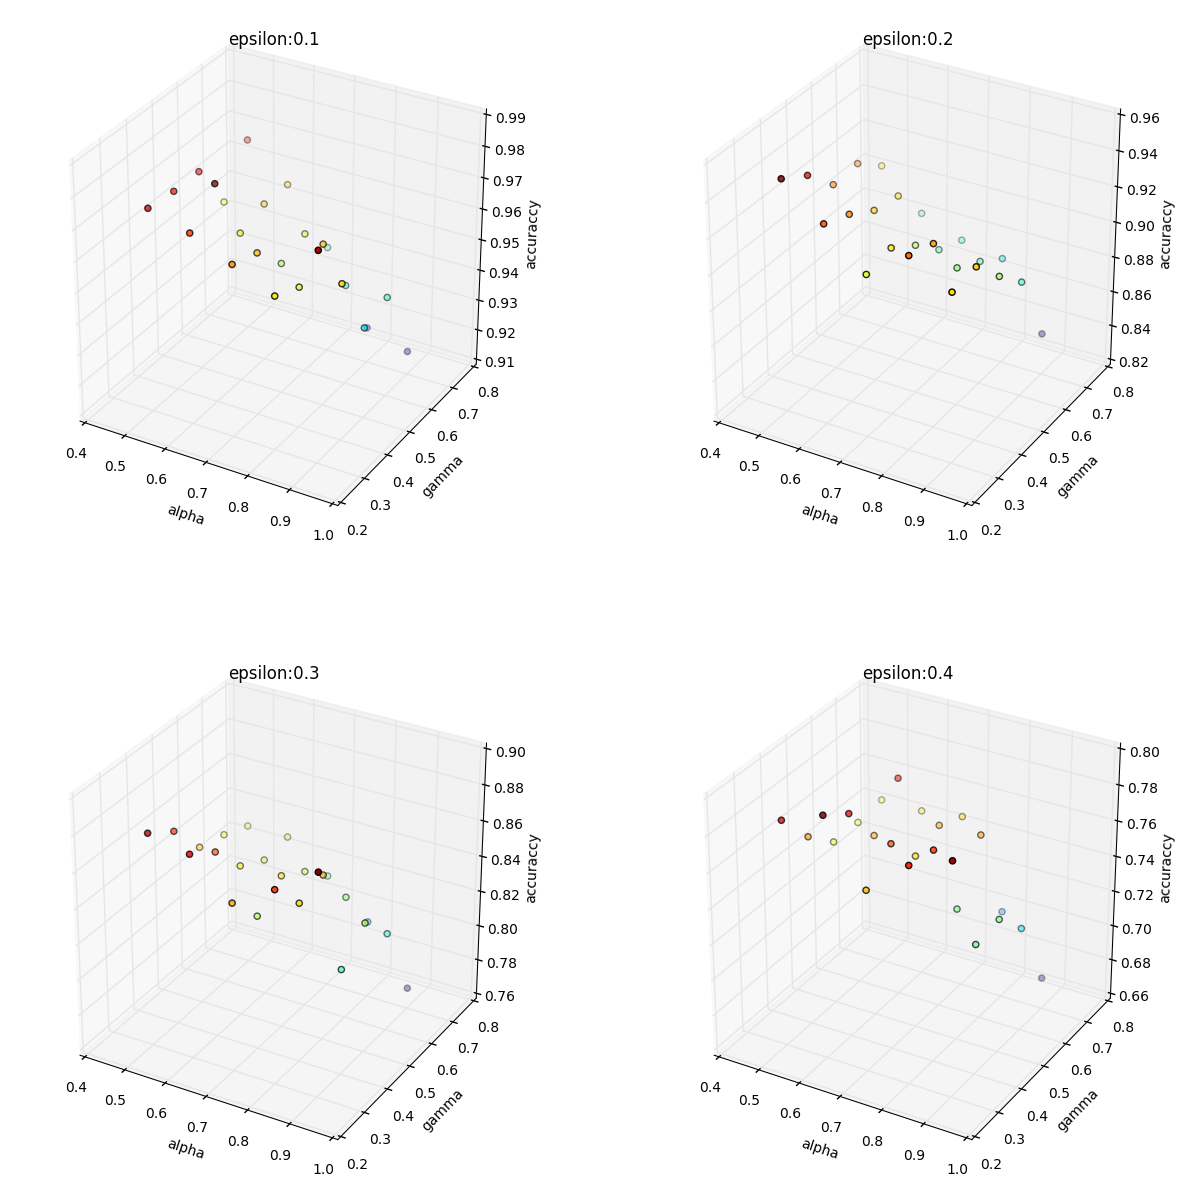

In [2]:
%matplotlib inline
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


df = pd.read_csv('output.csv')
epsilons = [.1, .2, .3, .4]

fig = plt.figure(figsize=(30, 30))
for i, v in enumerate(epsilons):
    ax = fig.add_subplot(221+i, projection='3d')
    data = df[df.epsilon == v]
    ax.scatter(data.alpha, data.gamma, data.accuracy, c=data.accuracy)
    ax.set_xlabel('alpha')
    ax.set_ylabel('gamma')
    ax.set_zlabel('accuraccy')
    ax.set_title('epsilon:%s' % v)
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()

从上面的结果可以看出，不管**epsilon**的值时多少，较高的**accuracy**都倾向于取较低的**gamma**，如0.3-0.5左右，而总体而言，对于较高的**accuracy**，**alpha**倾向于取0.7以下的值。

In [3]:
from IPython.display import display

for i, v in enumerate(epsilons):
    data = df[df.epsilon == v]
    del data['Unnamed: 0']
    print 'Epsilon: %s' % v
    display(data.describe())
    print

Epsilon: 0.1


,alpha,gamma,epsilon,accuracy
count,25.000000,25.000000,2.500000e+01,25.000000
mean,0.700000,0.500000,1.000000e-01,0.956440
std,0.144338,0.144338,2.832792e-17,0.016176
min,0.500000,0.300000,1.000000e-01,0.916000
25%,0.600000,0.400000,1.000000e-01,0.951000
50%,0.700000,0.500000,1.000000e-01,0.959000
75%,0.800000,0.600000,1.000000e-01,0.970000
max,0.900000,0.700000,1.000000e-01,0.979000



Epsilon: 0.2


,alpha,gamma,epsilon,accuracy
count,25.000000,25.000000,2.500000e+01,25.000000
mean,0.700000,0.500000,2.000000e-01,0.906800
std,0.144338,0.144338,5.665583e-17,0.022794
min,0.500000,0.300000,2.000000e-01,0.841000
25%,0.600000,0.400000,2.000000e-01,0.891000
50%,0.700000,0.500000,2.000000e-01,0.912000
75%,0.800000,0.600000,2.000000e-01,0.923000
max,0.900000,0.700000,2.000000e-01,0.948000



Epsilon: 0.3


,alpha,gamma,epsilon,accuracy
count,25.000000,25.000000,2.500000e+01,25.00000
mean,0.700000,0.500000,3.000000e-01,0.84036
std,0.144338,0.144338,1.133117e-16,0.02499
min,0.500000,0.300000,3.000000e-01,0.76900
25%,0.600000,0.400000,3.000000e-01,0.83100
50%,0.700000,0.500000,3.000000e-01,0.84300
75%,0.800000,0.600000,3.000000e-01,0.85200
max,0.900000,0.700000,3.000000e-01,0.88200



Epsilon: 0.4


,alpha,gamma,epsilon,accuracy
count,25.000000,25.000000,2.500000e+01,25.000000
mean,0.700000,0.500000,4.000000e-01,0.754840
std,0.144338,0.144338,1.133117e-16,0.027586
min,0.500000,0.300000,4.000000e-01,0.675000
25%,0.600000,0.400000,4.000000e-01,0.750000
50%,0.700000,0.500000,4.000000e-01,0.759000
75%,0.800000,0.600000,4.000000e-01,0.776000
max,0.900000,0.700000,4.000000e-01,0.793000


从对各个**epsilon**的取值结果的统计来看，较低的**epsilon**的最大的和最小的**accuracy**都取得最大，因此，**epsilon**应该取0.1左右的值。

最后，取得**accuracy**的最佳的参数为

|alpha|gamma|epsilon|accuracy|
|:-----:|:--------:|:--------:|:---------:|
|0.6   | 0.4      |0.1     |0.979|

这个结果也符合上文中对**alpha**,**gamma**和**epsilon**结果的推测。

***QUESTION 5:*** _Does your agent get close to finding an optimal policy, i.e. reach the destination in the minimum possible time, and not incur any penalties? How would you describe an optimal policy for this problem?_

***answer:***

1. 是的，汽车已经接近于找到了最优的policy
2. 我觉得基于这个问题的最优policy是汽车可以安全行驶（不违反交通规则和不发生交通事故）和快速到达目的地（以最短的时间到达）。而如果要优化policy的话，除了需要考虑**alpha**,**gamma**以及**epsilon**这些在学习时使用的参数外，还需要考虑状态的选择和设定（状态数太少算法会少学习很多action,er 状态数过多会让算法学习时间过长或者是算法很难收敛），以及奖励和惩罚的设置——这些是比**alpha**,**gamma**和**epsilon**还要基本的参数，而这些对算法的学习影响也很大。

## Submitting the Project
---
### Evaluation
Your project will be reviewed by a Udacity reviewer against the **<a href="https://review.udacity.com/#!/rubrics/106/view" target="_blank">Train a Smartcab to Drive project rubric</a>**. Be sure to review this rubric thoroughly and self-evaluate your project before submission. All criteria found in the rubric must be *meeting specifications* for you to pass.

### Submission Files
When you are ready to submit your project, collect the following files and compress them into a single archive for upload. Alternatively, you may supply the following files on your GitHub Repo in a folder named `smartcab` for ease of access:
 - The `agent.py` Python file with all code implemented as required in the instructed tasks.
 - A **PDF** project report with the name **report.pdf** which answers all of the questions related to the tasks completed. This file *must* be present for your project to be evaluated.

Once you have collected these files and reviewed the project rubric, proceed to the project submission page.

### I'm Ready!
When you're ready to submit your project, click on the **Submit Project** button at the bottom of the page.

If you are having any problems submitting your project or wish to check on the status of your submission, please email us at **machine-support@udacity.com** or visit us in the <a href="http://discussions.udacity.com" target="_blank">discussion forums</a>.

### What's Next?
You will get an email as soon as your reviewer has feedback for you. In the meantime, review your next project and feel free to get started on it or the courses supporting it!